<a href="https://colab.research.google.com/github/yilewang/TVB_Demo/blob/master/sim1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %%capture
# %pip install tvb-library
# %pylab inline
import os
from tvb.simulator.lab import *
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# %%capture
# ! wget -c -O 0306A.zip --no-check-certificate https://github.com/yilewang/TVB_Demo/raw/master/0306A.zip
path = os.path.abspath("0306A.zip")
print(path)

c:\Users\Wayne\tvb\TVB_demo\0306A.zip


In [4]:
connectivity.speed = np.array([10.])
sim_time = 1e4
sim = simulator.Simulator(
    model=ReducedSetHindmarshRose(),
    connectivity=connectivity.Connectivity.from_file(path),             
    coupling=coupling.Linear(a=np.array([0.015])),
    simulation_length=sim_time,
    integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                random_stream=np.random.RandomState(seed=42))),
    monitors=(
       monitors.TemporalAverage(period=1.),
       monitors.Raw(),
       monitors.ProgressLogger(period=1e2)
    )
).configure()
sim.configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: c58b5af3-92a5-46b4-a5ac-c341448ecac3
coupling,Linear gid: a93e8584-fd5f-43c1-8a2b-9f7e9400b94a
gid,UUID('6fc6d8d7-9c38-4923-91c7-449e43268751')
initial_conditions,None
integrator,HeunStochastic gid: b370adeb-49d2-47d4-bae8-660dfcb3245d
model,ReducedSetHindmarshRose gid: 3c3c9f3d-552d-460e-8b36-e7b13af0fabd
monitors,"(, , )"
simulation_length,10000.0


In [5]:
(tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()

   INFO  step 1 time 0.0000 s
   INFO  step 8193 time 0.1000 s
   INFO  step 16385 time 0.2000 s
   INFO  step 24577 time 0.3000 s
   INFO  step 32769 time 0.4000 s
   INFO  step 40961 time 0.5000 s
   INFO  step 49153 time 0.6000 s
   INFO  step 57345 time 0.7000 s
   INFO  step 65537 time 0.8000 s
   INFO  step 73729 time 0.9000 s
   INFO  step 81921 time 1.0000 s
   INFO  step 90113 time 1.1000 s
   INFO  step 98305 time 1.2000 s
   INFO  step 106497 time 1.3000 s
   INFO  step 114689 time 1.4000 s
   INFO  step 122881 time 1.5000 s
   INFO  step 131073 time 1.6000 s
   INFO  step 139265 time 1.7000 s
   INFO  step 147457 time 1.8000 s
   INFO  step 155649 time 1.9000 s
   INFO  step 163841 time 2.0000 s
   INFO  step 172033 time 2.1000 s
   INFO  step 180225 time 2.2000 s
   INFO  step 188417 time 2.3000 s
   INFO  step 196609 time 2.4000 s
   INFO  step 204801 time 2.5000 s
   INFO  step 212993 time 2.6000 s
   INFO  step 221185 time 2.7000 s
   INFO  step 229377 time 2.8000 s
   

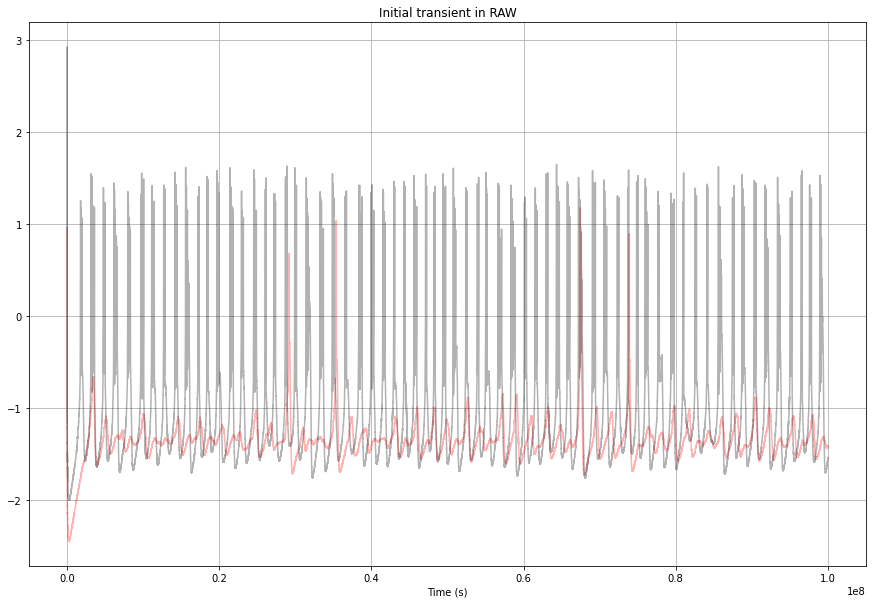

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(raw_time * sim_time, raw_data[:, 0, 4, 0], "r", alpha=0.3)
plt.plot(raw_time * sim_time, raw_data[:, 0, 5, 0], "k", alpha=0.3)
plt.title('Initial transient in RAW')
plt.xlabel('Time (s)')
plt.grid(True);

In [7]:
from scipy import signal
def fir_bandpass(data, fs, cut_off_low, cut_off_high, width=2.0, ripple_db=10.0):
    """
    The FIR bandpass filter
    """
    nyq_rate = fs / 2.0
    wid = width/nyq_rate
    N, beta = signal.kaiserord(ripple_db, wid)
    taps = signal.firwin(N, cutoff = [cut_off_low, cut_off_high],
                  window = 'hamming', pass_zero = False, fs=fs)
    filtered_signal = signal.lfilter(taps, 1.0, data)
    return filtered_signal, N

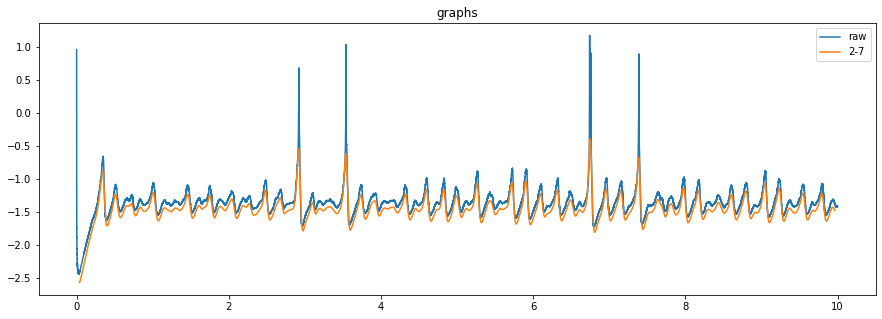

In [25]:
fs = 81920.0
samplinginterval = 1/fs
tt = np.arange(0, 10, samplinginterval)
rightTheta, N = fir_bandpass(raw_data[:,0,4,0], fs, 2.0, 10.0)
rightGamma, N = fir_bandpass(raw_data[:,0,4,0], fs, 30.0, 100)
delay = (N-1)/(2*fs)
# visualization
fig = plt.figure(figsize=(15,5))
plt.title("graphs")
plt.plot(tt, raw_data[:,0,4,0], label = "raw")
# plt.plot(raw_time[N-1:]-delay, rightGamma[N-1:], label = "35-100")
plt.plot(tt[N-1:]-delay, rightTheta[N-1:], label = "2-10")
#plt.axis(xmin=0, xmax=1)
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

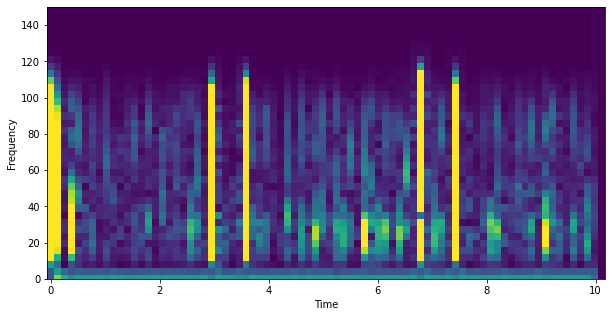

In [26]:
afterRe = signal.resample(rightGamma, 10000)
f, t, Z = signal.stft(afterRe, fs=1000, window='hann', nperseg=256)
Z = np.abs(Z)
plt.figure(figsize = (10,5))
plt.pcolormesh(t, f, Z, vmin = 0, vmax = Z.mean()*10, shading="auto")
plt.axis(ymin=0, ymax=150)
plt.xlabel('Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

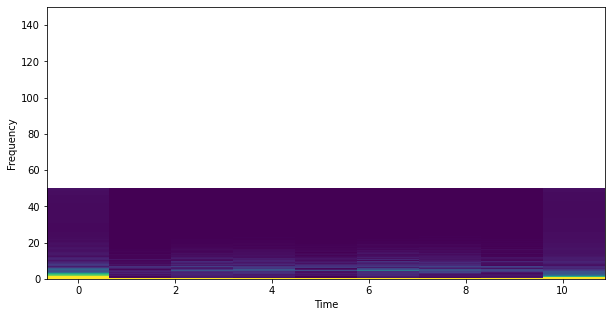

In [27]:
afterRe = signal.resample(rightTheta, 1000)
f, t, Z = signal.stft(afterRe, fs=100, window='hann', nperseg=256)
Z = np.abs(Z)
plt.figure(figsize = (10,5))
plt.pcolormesh(t, f, Z, vmin = 0, vmax = Z.mean()*10, shading="auto")
plt.axis(ymin=0, ymax=150)
plt.xlabel('Time')
plt.ylabel('Frequency')